<a href="https://colab.research.google.com/github/flohmannjr/tensorflow_curso/blob/main/TensorFlow_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Neural Network Classification

## Importar biblioteca

In [ ]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Setup

In [ ]:
# Ajustes MatPlotLib
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100
plt.style.use('seaborn-darkgrid')

# Determinando um seed
seed = 2008193

### Função plot_decision_boundary

In [ ]:
def plot_decision_boundary(model, X, y, cmap):
    """
    Plots the decision boundary created by a model predicting on X.
    This function has been adapted from two phenomenal resources:
    1. CS231n - https://cs231n.github.io/neural-networks-case-study/
    2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
    """

    # Define the axis boundaries of the plot
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create a meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X values (we're going to predict on all of these)
    # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Make predictions using the trained model
    y_pred = model.predict(x_in, verbose=0)

    # Check for multi-class
    # Checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    if model.output_shape[-1] > 1:
        # Multiclass classification
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        # Binary classifcation
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # Plots
    plt.contourf(xx, yy, y_pred, cmap=cmap, alpha=0.6)
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=cmap)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, cmap=cmap)

    # Plot decision boundary
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # No legend
    plt.legend('')

### Função get_color_gradient

https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b

In [ ]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n=32):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

### Cores

In [ ]:
from matplotlib.colors import ListedColormap

cor_inicial = '#4c72b0'
cor_final = '#dd8452'

limites = ListedColormap([cor_inicial, cor_final])
gradiente = ListedColormap(get_color_gradient(cor_inicial, cor_final, 10))

## Dados para testes iniciais

In [ ]:
# from sklearn.datasets import make_circles

# # Quantidade de amostras
# n_amostras = 1000

# # Criar círculos
# X, y = make_circles(n_samples=n_amostras,
#                     noise=0.03,
#                     random_state=seed)

In [ ]:
# circulos = pd.DataFrame({'cx': X[:, 0],
#                          'cy': X[:, 1],
#                          'rotulo': y})

# circulos.head()

### Visualizando os dados

In [ ]:
# sns.scatterplot(data=circulos, x='cx', y='cy', hue='rotulo')

# plt.xlabel('')
# plt.ylabel('')

# plt.legend('');

### Separando dados

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## Modelo inicial (binário)

In [ ]:
# tfc = tf.keras.Sequential()

# # Camada de entrada com formato
# tfc.add(tf.keras.Input(shape=(2,)))

# # Camada oculta ReLU
# tfc.add(tf.keras.layers.Dense(100, activation='relu'))

# # Camada de saída Sigmoid (para classificão binária)
# tfc.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# tfc.compile(loss='binary_crossentropy',
#             optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
#             metrics=['accuracy'])

# hist_tfc = tfc.fit(X_train, y_train, epochs=100, verbose=0)

# tfc.evaluate(X_test, y_test)

### Visualizando o modelo

In [ ]:
# sns.lineplot(data=hist_tfc.history['loss'], label='Perda')
# sns.lineplot(data=hist_tfc.history['accuracy'], label='Precisão')

# plt.title('Histórico de perda e precisão por iteração')
# plt.xlabel('Iteração')
# plt.ylabel('Perda / Precisão')

# plt.legend(frameon=True, facecolor='white');

In [ ]:
# plot_decision_boundary(tfc, X_test, y_test, limites)

## Encontrando o melhor taxa de aprendizado (via callback)

In [ ]:
# tfcb = tf.keras.Sequential()

# tfcb.add(tf.keras.Input(shape=(2,)))
# tfcb.add(tf.keras.layers.Dense(100, activation='relu'))
# tfcb.add(tf.keras.layers.Dense(1, 'sigmoid'))

# tfcb.compile(loss='binary_crossentropy',
#              optimizer='Adam',
#              metrics=['accuracy'])

# # Scheduler: lambda epoch: 1e-4 * 10 ** (epoch / 20)
# lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: tf.multiply(0.0001, tf.pow(10, tf.divide(epoch, 20))))

# hist_tfcb = tfcb.fit(X_train, y_train, epochs=100, callbacks=[lrs], verbose=0)

In [ ]:
# sns.lineplot(x=hist_tfcb.history['lr'], y=hist_tfcb.history['loss'], label='Perda')
# sns.lineplot(x=hist_tfcb.history['lr'], y=hist_tfcb.history['accuracy'], label='Precisão')

# plt.xscale('log')

# plt.title('Histórico de perda e precisão por taxa de aprendizado')
# plt.xlabel('Taxa de aprendizado')
# plt.ylabel('Perda / Precisão')

# plt.legend(frameon=True, facecolor='white');

## Métodos de avaliação de classificação

**tp** - True Positive
<br>
**tn** - True Negative
<br>
**fp** - False Positive
<br>
**fn** - False Negative

**Accuracy**: $\Large \  \frac{tp \ + \ tn}{tp \ + \ tn \ + \ fp \ + \ fn}$
<br><p>
**Precision**: $\Large \  \frac{tp}{tp \ + \ fp}$
<br><p>
**Recall**: $\Large \  \frac{tp}{tp \ + \ fn}$
<br><p>
**F1-score**: $\large \ 2 \cdot \Large \frac{precision \ \cdot \ recall}{precision \ + \ recall}$

### Previsão

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# y_pred = tfc.predict(X_test)
# y_pred[:3]

**y_pred** está em formato probabilístico, que é o padrão para funções Sigmoid e Softmax.

In [ ]:
# y_pred = tf.round(y_pred)

### Relatório de classificação

In [ ]:
# print(classification_report(y_test, y_pred))

### Matriz de confusão

In [ ]:
# confusion_matrix(y_test, y_pred)

In [ ]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=gradiente)
# plt.grid(False)

## Modelo multiclasse

### Dados

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Rótulos
rotulos = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Amostra

In [ ]:
# plt.figure(figsize=(8, 8))

# for i in range(25):
#     eixo = plt.subplot(5, 5, i + 1)
#     item = tf.random.uniform(shape=[], maxval=len(X_train), dtype=tf.int32)
#     plt.imshow(X_train[item], cmap='gray_r')
#     plt.title(f'[{item}] {rotulos[y_train[item]]}', fontdict={'fontsize': 8})
#     plt.axis(False)

#### Escalonamento

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# Dividir X_train e X_test por X_train.max() para escalonar os valores para o intervalo [0, 1]

max = X_train.max()

X_train = tf.divide(X_train, max)
X_test = tf.divide(X_test, max)

#### One-hot rótulos

In [ ]:
# Para utilizarmos loss='categorical_crossentropy' e também podermos avaliar a classificação.

y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

### Modelo

In [ ]:
moda = tf.keras.Sequential()

moda.add(tf.keras.layers.Flatten(input_shape=X_train[0].shape))
moda.add(tf.keras.layers.Dense(40, activation='relu'))
moda.add(tf.keras.layers.Dense(40, activation='relu'))
moda.add(tf.keras.layers.Dense(10, activation='softmax'))

moda.compile(loss='categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
            #  optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

# lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: tf.multiply(0.0001, tf.pow(10, tf.divide(epoch, 20))))

hist_moda = moda.fit(x=X_train,
                     y=y_train,
                     epochs=40,
                    #  epochs=100,
                    #  validation_data=(X_test, y_test),
                    #  callbacks=[lrs],
                     verbose=0)

moda.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5209 - accuracy: 0.8436


[0.5208508372306824, 0.8435999751091003]

In [ ]:
# Verificar a melhor taxa de aprendizado

# sns.lineplot(x=hist_moda.history['lr'], y=hist_moda.history['loss'], label='Perda')
# sns.lineplot(x=hist_moda.history['lr'], y=hist_moda.history['accuracy'], label='Precisão')

# plt.xscale('log')

# plt.title('Histórico de perda e precisão por taxa de aprendizado')
# plt.xlabel('Taxa de aprendizado')
# plt.ylabel('Perda / Precisão')

# plt.legend(frameon=True, facecolor='white');

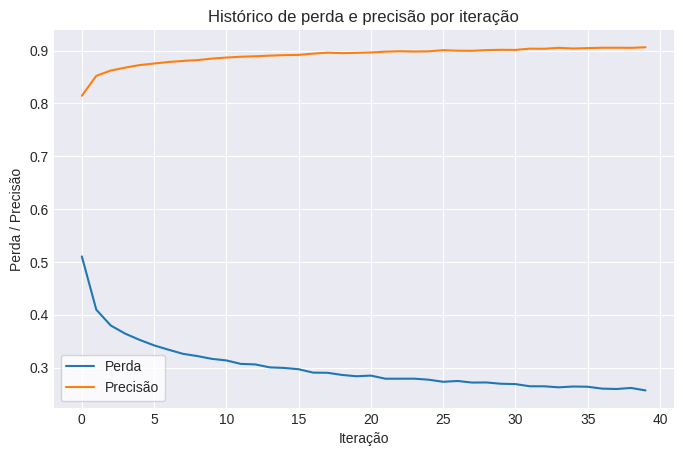

In [ ]:
sns.lineplot(data=hist_moda.history['loss'], label='Perda')
sns.lineplot(data=hist_moda.history['accuracy'], label='Precisão')

plt.title('Histórico de perda e precisão por iteração')
plt.xlabel('Iteração')
plt.ylabel('Perda / Precisão')

plt.legend(frameon=True, facecolor='white');

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.91      0.61      0.73      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.77      0.67      0.71      1000
       Dress       0.89      0.81      0.85      1000
        Coat       0.82      0.69      0.75      1000
      Sandal       0.93      0.97      0.95      1000
       Shirt       0.55      0.76      0.64      1000
     Sneaker       0.92      0.95      0.94      1000
         Bag       0.97      0.96      0.96      1000
  Ankle boot       0.98      0.91      0.94      1000

   micro avg       0.86      0.83      0.84     10000
   macro avg       0.87      0.83      0.84     10000
weighted avg       0.87      0.83      0.84     10000
 samples avg       0.83      0.83      0.83     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


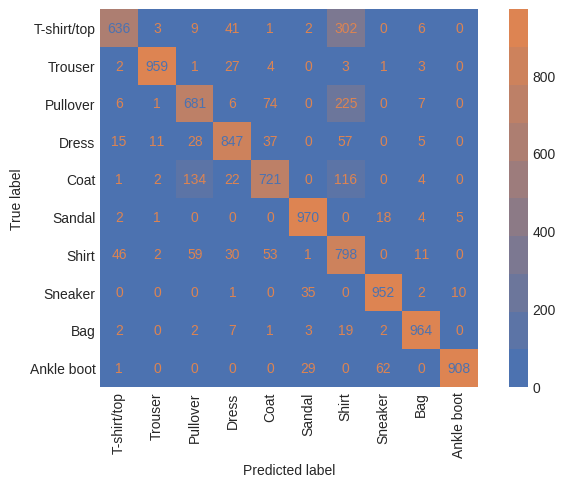

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = moda.predict(X_test)

print(classification_report(y_test, tf.round(y_pred), target_names=rotulos))

# Utilizando tf.argmax(..., axis=1) para retornar o índice com o maior valor, que é equivalente ao rótulo.

# print(confusion_matrix(tf.argmax(y_test, axis=1), tf.argmax(y_pred, axis=1)))

ConfusionMatrixDisplay.from_predictions(tf.argmax(y_test, axis=1),
                                        tf.argmax(y_pred, axis=1),
                                        display_labels=rotulos,
                                        xticks_rotation='vertical',
                                        cmap=gradiente)
plt.grid(False)